In [739]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


In [740]:
df = pd.read_csv('dataset/hcho.csv')
df

,HCHO,Location,Current date,Next date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000176,Nuwara Eliya Proper,2019-01-01,2019-01-02
3,0.000176,Kandy Proper,2019-01-01,2019-01-02
4,0.000176,"Bibile, Monaragala",2019-01-01,2019-01-02
...,...,...,...,...
12649,0.000080,Nuwara Eliya Proper,2023-12-31,2024-01-01
12650,0.000080,Kandy Proper,2023-12-31,2024-01-01
12651,0.000065,"Bibile, Monaragala",2023-12-31,2024-01-01
12652,0.000065,Kurunegala Proper,2023-12-31,2024-01-01


In [741]:
df = df.drop(columns=['Next date'])

In [742]:
# Convert 'Current date' to datetime
df['Current date'] = pd.to_datetime(df['Current date'])

# Get unique locations
unique_locations = df['Location'].unique()

# Create separate DataFrame for each location with dynamic variable naming
for location in unique_locations:
    globals()[location.replace(" ", "_").replace(",", "").replace(" ", "_") + "_df"] = df.loc[df['Location'] == location].drop(columns='Location').set_index('Current date')

# Access DataFrame for 'Colombo Proper'
print(Colombo_Proper_df.head())
print(Deniyaya_Matara_df.head())
print(Nuwara_Eliya_Proper_df.head())
print(Kandy_Proper_df.head())
print(Bibile_Monaragala_df.head())
print(Kurunegala_Proper_df.head())
print(Jaffna_Proper_df.head())

                  HCHO
Current date          
2019-01-01    0.000197
2019-01-02    0.000263
2019-01-03    0.000099
2019-01-04    0.000210
2019-01-05    0.000179
                  HCHO
Current date          
2019-01-01    0.000197
2019-01-02    0.000006
2019-01-03    0.000236
2019-01-04    0.000064
2019-01-05    0.000053
                  HCHO
Current date          
2019-01-01    0.000176
2019-01-02    0.000006
2019-01-03    0.000191
2019-01-04    0.000051
2019-01-05    0.000065
                  HCHO
Current date          
2019-01-01    0.000176
2019-01-02    0.000092
2019-01-03    0.000191
2019-01-04    0.000191
2019-01-05    0.000122
                  HCHO
Current date          
2019-01-01    0.000176
2019-01-02    0.000019
2019-01-03    0.000028
2019-01-04    0.000037
2019-01-05   -0.000018
                  HCHO
Current date          
2019-01-01    0.000088
2019-01-02    0.000137
2019-01-03    0.000148
2019-01-04   -0.000002
2019-01-05    0.000249
                  HCHO
Current dat

In [743]:
Colombo_Proper_df

,HCHO
Current date,
2019-01-01,0.000197
2019-01-02,0.000263
2019-01-03,0.000099
2019-01-04,0.000210
2019-01-05,0.000179
...,...
2023-12-27,0.000118
2023-12-28,0.000075
2023-12-29,0.000051


In [744]:
Colombo_Proper_df.to_csv('dataset/cmb.csv')

<Axes: xlabel='Current date'>

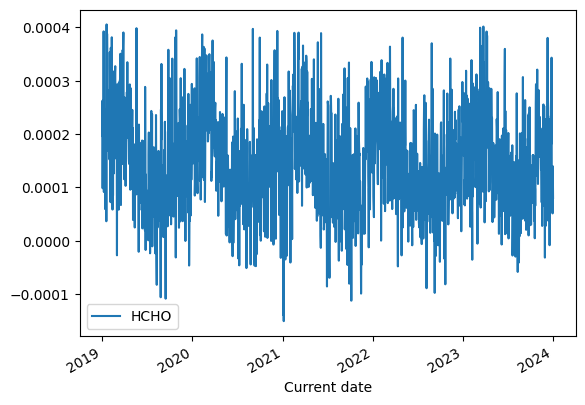

In [745]:
Colombo_Proper_df.plot()

ADF Statistic: -4.960174834388474
p-Value: 2.6593843465930636e-05
Time series is likely stationary.


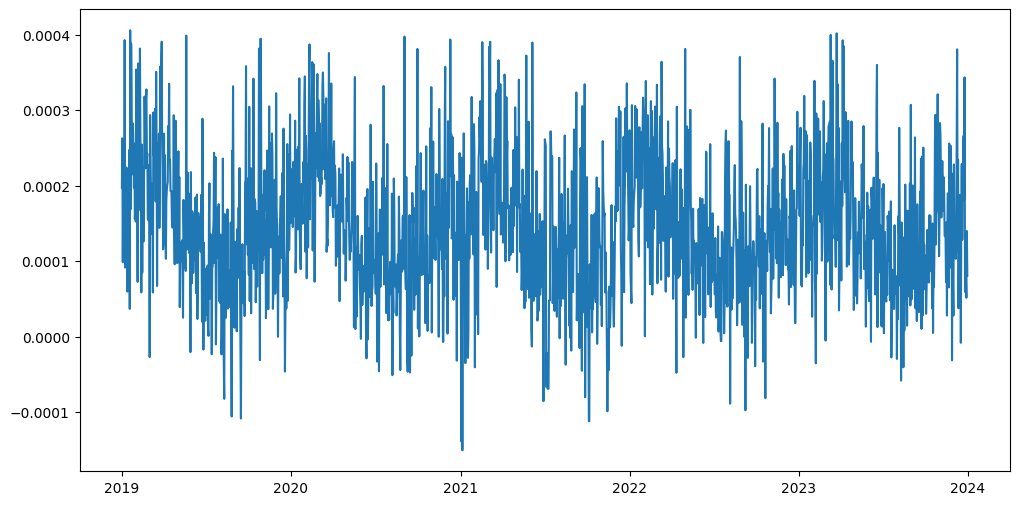

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

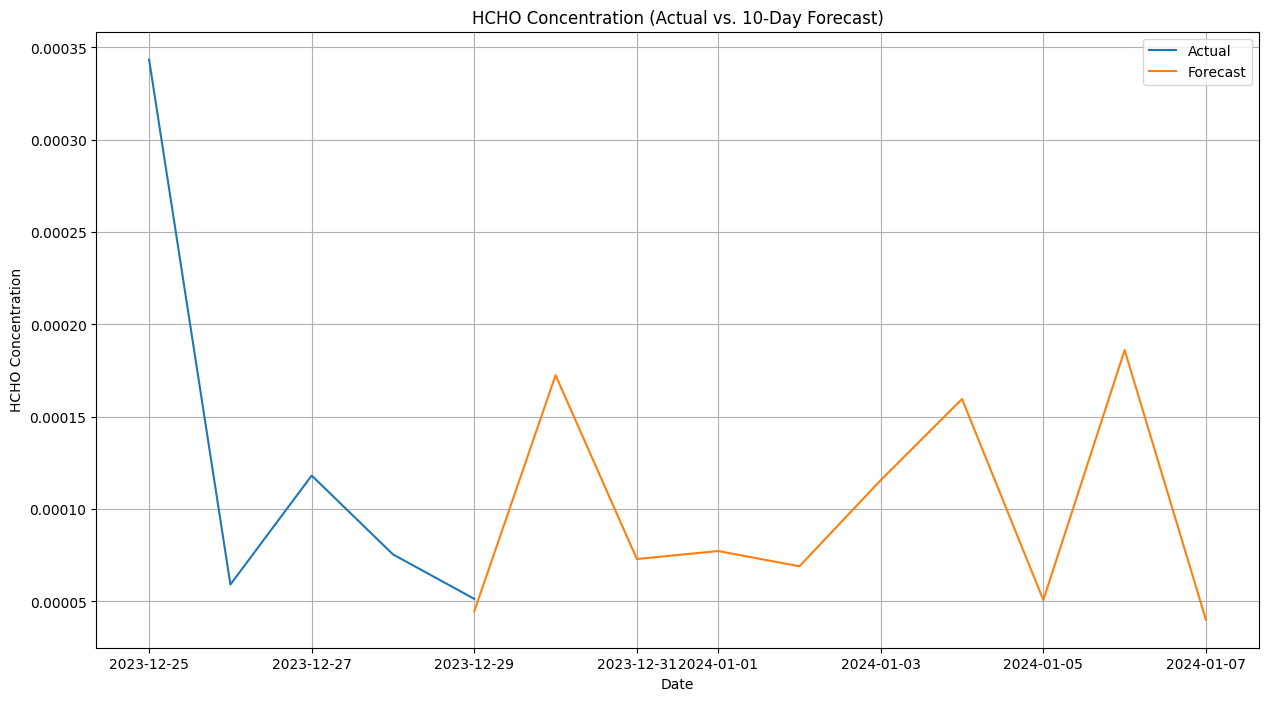

In [746]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt

# Assuming your data is in a CSV file named 'dataset/cmb.csv'
data = pd.read_csv('dataset/cmb.csv', index_col='Current date', parse_dates=True)
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
  # Perform Dickey-Fuller test
  dftest = adfuller(timeseries)
  dfvalue = dftest[0]
  pvalue = dftest[1]
  # Print test results
  print("ADF Statistic:", dfvalue)
  print("p-Value:", pvalue)
  # Interpret test results (conventionally, p-Value < 0.05 indicates stationarity)
  if pvalue < 0.05:
    print("Time series is likely stationary.")
  else:
    print("Time series is likely non-stationary.")

test_stationarity(data['HCHO'])

# Daily data might not have seasonality, but inspect your data for patterns
# Seasonality could be weekly, monthly, quarterly, or yearly depending on the data

# View data to identify potential seasonality (e.g., daily plots)
plt.figure(figsize=(12, 6))
plt.plot(data['HCHO'])
plt.show()

# Use all data up to the forecast start date for training (2023-12-30)
train = data.loc[:pd.to_datetime('2023-12-30')]  

# Define forecast horizon
future_steps = 10  # Forecast for 10 days

# Set the forecast start date (2023-12-30)
start_date = pd.to_datetime('2023-12-29')

# Filter data for plotting actual values (2023-12-25 to 2023-12-31)
plot_actual_dates = pd.date_range(start=pd.to_datetime('2023-12-25'), end=start_date-pd.Timedelta(days=0))

# Generate forecast for the next 7 days
future_forecast = train  # Use all data up to forecast start date for training
model = SARIMAX(future_forecast['HCHO'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7),
                 initialization='diffuse')
model_fit = model.fit()
forecast = model_fit.forecast(steps=future_steps)

# Prepare forecast dates
forecast_dates = pd.date_range(start=start_date, periods=future_steps)

# Plot actual data and forecast
plt.figure(figsize=(15, 8))
plt.plot(plot_actual_dates, data.loc[plot_actual_dates, 'HCHO'], label='Actual')
plt.plot(forecast_dates, forecast, label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('HCHO Concentration')
plt.title('HCHO Concentration (Actual vs. 10-Day Forecast)')
plt.grid(True)
plt.show()


In [747]:
# Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [748]:
test_result=adfuller(Colombo_Proper_df['HCHO'])

In [749]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(hcho):
    result=adfuller(hcho)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [750]:
adfuller_test(Colombo_Proper_df['HCHO'])

ADF Test Statistic : -4.960174834388454
p-value : 2.659384346593318e-05
#Lags Used : 15
Number of Observations Used : 1789
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


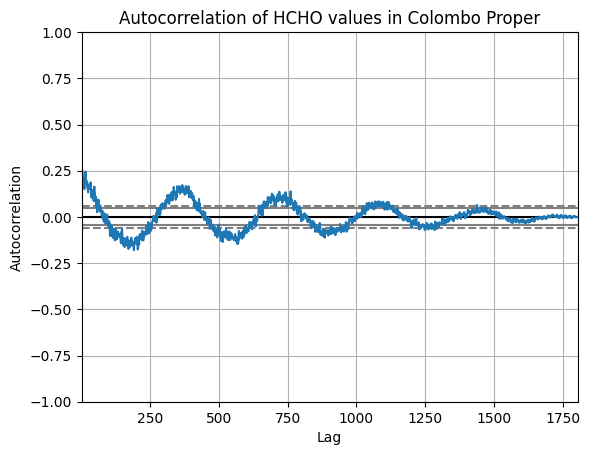

In [751]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

autocorrelation_plot(Colombo_Proper_df['HCHO'])
plt.title('Autocorrelation of HCHO values in Colombo Proper')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


In [752]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

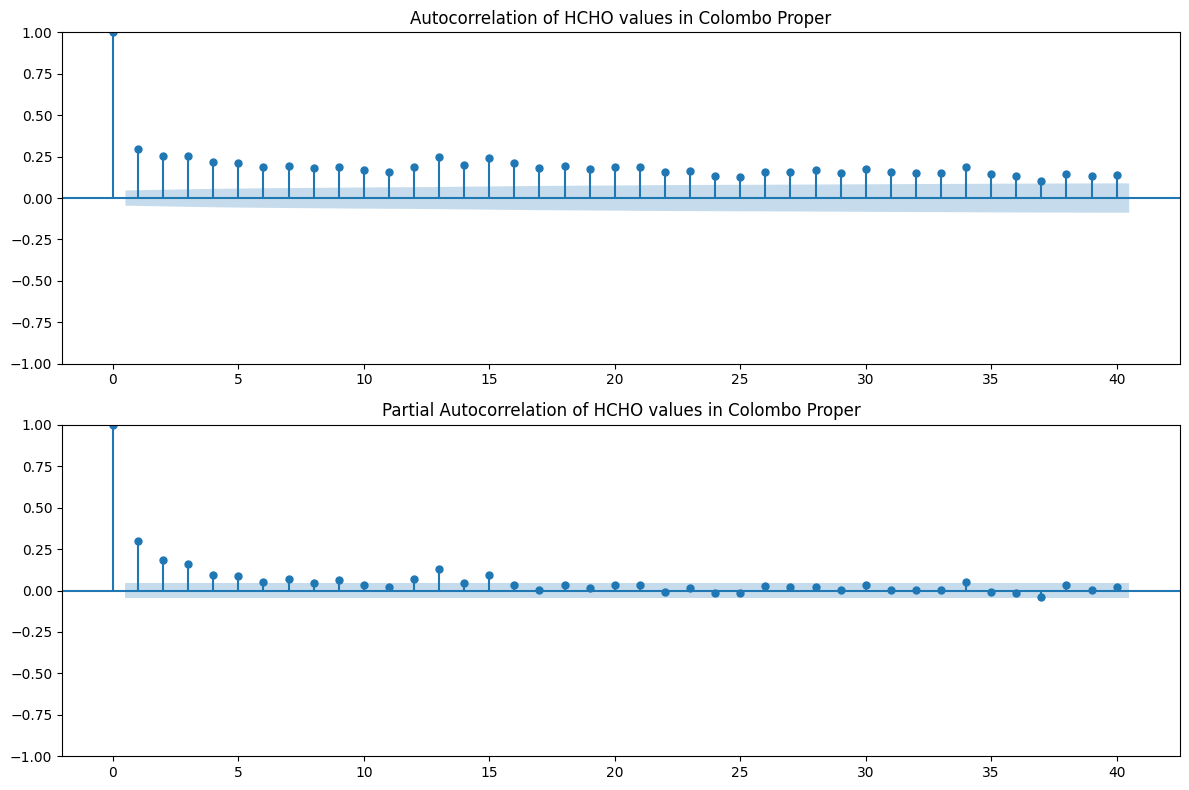

In [753]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Colombo_Proper_df['HCHO'].iloc[13:], lags=40, ax=ax1)
ax1.set_title('Autocorrelation of HCHO values in Colombo Proper')

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Colombo_Proper_df['HCHO'].iloc[13:], lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation of HCHO values in Colombo Proper')

plt.tight_layout()
plt.show()


In [754]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [755]:
import statsmodels.api as sm

# Fit the SARIMAX model
model = sm.tsa.SARIMAX(Colombo_Proper_df['HCHO'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)



C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [756]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   HCHO   No. Observations:                 1805
Model:               SARIMAX(1, 1, 1)   Log Likelihood               14293.650
Date:                Fri, 19 Apr 2024   AIC                         -28581.301
Time:                        09:54:14   BIC                         -28564.807
Sample:                             0   HQIC                        -28575.213
                               - 1805                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0298   7.64e-19    3.9e+16      0.000       0.030       0.030
ma.L1         -0.7207   1.39e-18  -5.17e+17      0.000      -0.721      -0.721
sigma2      7.203e-09   2.31e-10     31.155      0.000    6.75e-09    7.66e-09
===================================================================================
Ljung-Box (L1) (Q):                  26.71   Jarque-Bera (JB):                20.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.18
Prob(H) (two-sided):                  0.42   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.11e+33. Standard errors may be unstable.
"""

<Axes: xlabel='Current date'>

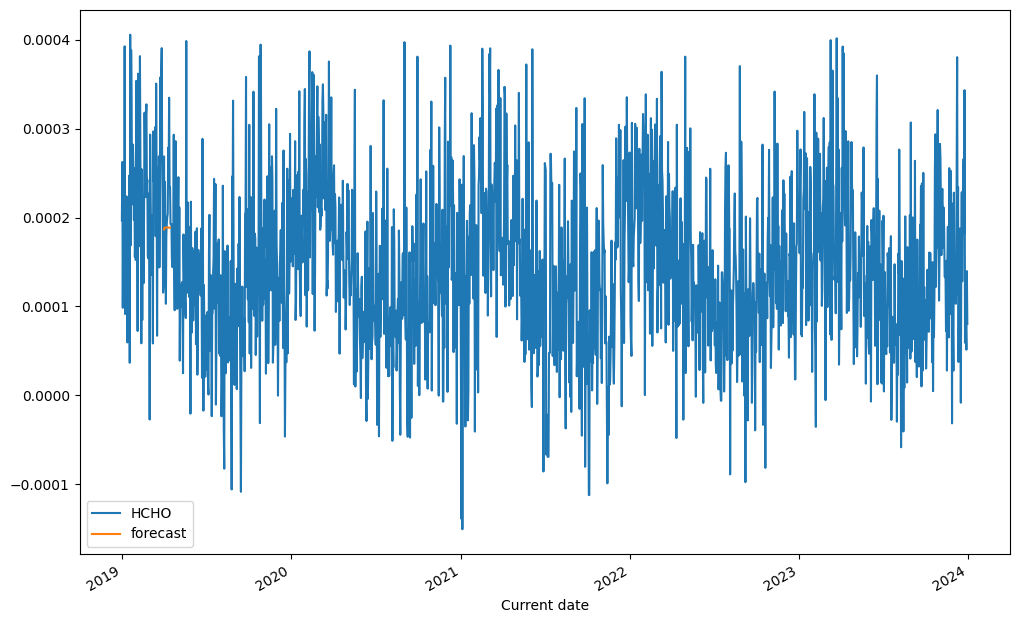

In [757]:
Colombo_Proper_df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
Colombo_Proper_df[['HCHO','forecast']].plot(figsize=(12,8))

In [758]:
import statsmodels.api as sm

In [759]:
model=sm.tsa.statespace.SARIMAX(Colombo_Proper_df['HCHO'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='Current date'>

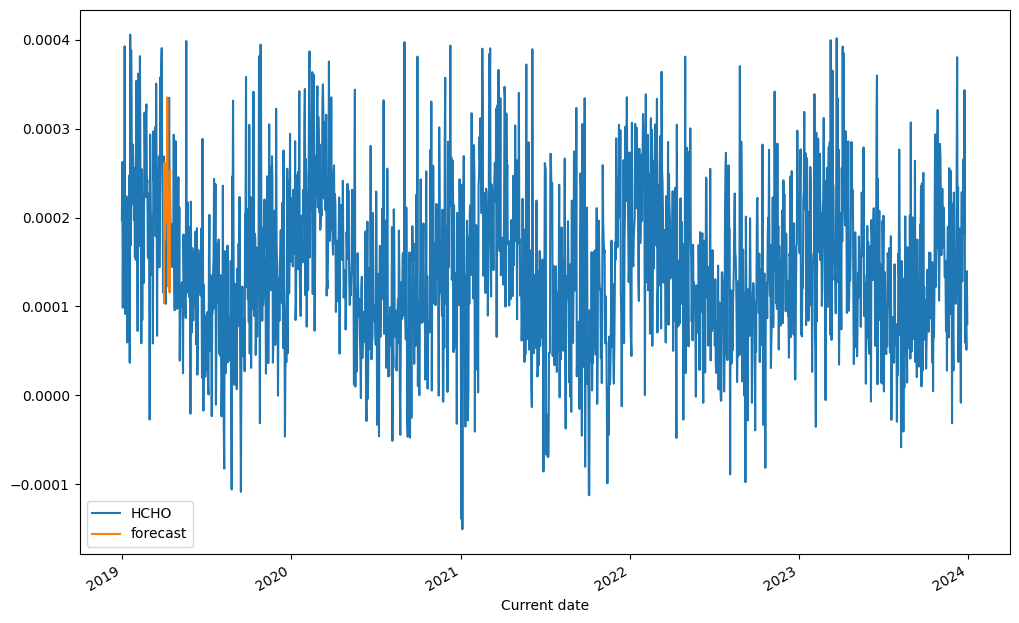

In [760]:
Colombo_Proper_df['forecast']=results.predict(start=90,end=103,dynamic=True)
Colombo_Proper_df[['HCHO','forecast']].plot(figsize=(12,8))